# Q1. Multiple Linear Regression using Batch Gradient Descent 
(Generalization of Simple Linear Regression )

Imports

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import preprocessing as pp
from sklearn import metrics
import matplotlib.pyplot as plt

Get Data

In [0]:
X, y = load_boston(return_X_y=True)
print(X.shape,y.shape)

(506, 13) (506,)


Data Pre-processing

In [0]:
#Splitting for training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.reshape((-1,1)) #reshape for (N,) --> (N,1)
y_test = y_test.reshape((-1,1))

#z-score normalization
scaler = pp.StandardScaler()
scaler.fit(X_train) #learning attributes from training set
scaler.transform(X_train) #normalizing training set with attributes from training set
scaler.transform(X_test) #normalizing testing set with attributes from training set

#Adding dummy variable
X_train = pp.add_dummy_feature(X_train)
X_test = pp.add_dummy_feature(X_test)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(404, 14) (404, 1) (102, 14) (102, 1)


Parameter Learning using Batch Gradient Descent

In [0]:
#Intialization
theta = np.random.random(size=(X_train.shape[1],1))
epochs = 25 #number of iterations
alpha = 0.000001 #learning_rate
M = X_train.shape[0]
err = []

#Gradient descent
for i in range(epochs): 
    error = (np.dot(X_train,theta) - y_train).T #(y_pred - y_train)
    err.append(np.mean(np.abs(error)))
    for j in range(theta.shape[0]):
        theta[j] = theta[j] - (alpha/M)*np.dot(error,X_train[:,j].reshape(-1,1)) #updating theta[j]

#final parameter values
print(theta.T)
print(theta.shape)

[[ 0.97965526  0.29592704  0.08544314  0.31051762  0.51509996  0.29706382
   0.39873003  0.51917837  0.50768537  0.23609524 -0.17153163  0.56024563
   0.06614621  0.90820471]]
(14, 1)


Testing

In [0]:
y_pred = np.dot(X_test,theta)
print('MAE: ',metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred))
print('MSE: ',metrics.mean_squared_error(y_true=y_test,y_pred=y_pred))

MAE:  20.83717985292296
MSE:  665.3004133909573


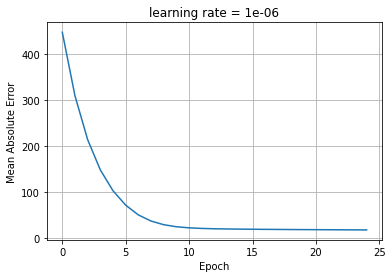

In [0]:
#Error vs. epoch plot
plt.plot(np.arange(0,epochs).reshape((-1,1)),np.abs(err))
plt.title('learning rate = ' + str(alpha))
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()